In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from fsmodels import SklSingleExpFrequencyScan

# sklearn-compatible class

In [2]:
frequency_powers = np.linspace(0, 3.5, 1000)
frequency_powers = tf.Variable(frequency_powers, dtype='float64').numpy()

In [3]:
fs = SklSingleExpFrequencyScan(filling_pulse=20*10**-6)

fs.exps_params_ = [-2.3, 3.5]
fs.p_coef_ = 0.2

experimental_dlts = fs.predict(frequency_powers) 
experimental_dlts += np.random.normal(loc=0, scale=0.2, size=experimental_dlts.shape[0])

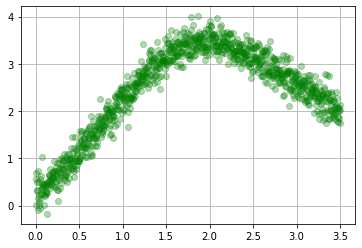

In [4]:
plt.plot(frequency_powers, experimental_dlts, 'og', alpha=0.3)
plt.grid()
plt.show()

In [5]:
fs = SklSingleExpFrequencyScan(filling_pulse=2*10**-6,
                               fit_p_coef = True,
                               learning_rate=0.05,
                               n_iters=200,
                               stop_val=10**-5,
                               verbose=False
                              )

fs.fit(X=frequency_powers, y=experimental_dlts)

SklSingleExpFrequencyScan(filling_pulse=2e-06, learning_rate=0.05, n_iters=200,
                          stop_val=1e-05)

In [6]:
fit_results = fs.fit_results_
fit_results

,n_exps,filling_pulse,loss,amplitude,time_constant_power,p_coef
0,1,0.000002,2.566031,3.5,-2.839716,1.0
1,1,0.000002,2.116188,3.516261,-2.706128,0.928184
2,1,0.000002,1.718316,3.536337,-2.591557,0.844818
3,1,0.000002,1.354068,3.558797,-2.4965,0.750063
4,1,0.000002,1.002773,3.582217,-2.419547,0.644375
...,...,...,...,...,...,...
69,1,0.000002,0.040856,3.5131,-2.280432,0.209141
70,1,0.000002,0.040844,3.512346,-2.280539,0.209023
71,1,0.000002,0.040833,3.511615,-2.280643,0.208909
72,1,0.000002,0.040823,3.510905,-2.280744,0.208798


In [7]:
fs.exps_params_

array([-2.28093761,  3.50954942])

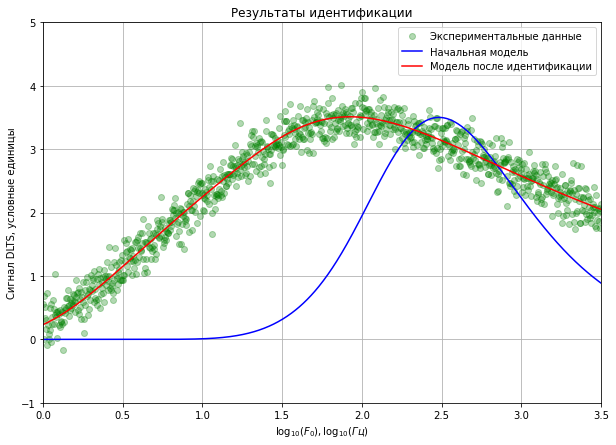

In [8]:
def plot_ident_res(frequency_powers,
                   experimental_dlts, 
                   fit_results
                  ):
    
    indices = frequency_powers.argsort()
    frequency_powers = frequency_powers[indices]
    experimental_dlts = experimental_dlts[indices]
    
    init_params = fit_results.iloc[0, :]
    init_exps_params = [init_params.time_constant_power, init_params.amplitude]
    init_p_coef = init_params.p_coef
    
    
    fs = SklSingleExpFrequencyScan(filling_pulse = fit_results.filling_pulse[0])
    
    fs.exps_params_ = init_exps_params
    fs.p_coef_ = init_p_coef
    initial_model = fs.predict(frequency_powers)
    
    
    final_params = fit_results.iloc[-1, :]
    final_exps_params = [final_params.time_constant_power, final_params.amplitude]
    final_p_coef = final_params.p_coef
    
    fs.exps_params_=final_exps_params
    fs.p_coef_ = final_p_coef
    final_model = fs.predict(frequency_powers)
    

    fig, ax = plt.subplots(1, 1, figsize=(10, 7))

    ax.plot(frequency_powers, experimental_dlts, 'og', alpha=0.3, label='Экспериментальные данные')

    ax.plot(frequency_powers, initial_model, '-b', label='Начальная модель')

    ax.plot(frequency_powers, final_model, '-r', label='Модель после идентификации')

    ax.legend()
    ax.grid()
    ax.set_xlim([0, 3.5])
    ylim = ax.get_ylim()
    ylim = [np.floor(ylim[0]), np.ceil(ylim[1])]
    ax.set_ylim(ylim)
    
    ax.set_title('Результаты идентификации')
    ax.set_xlabel(r'$\log_{10}(F_0), \log_{10}(Гц)$')
    ax.set_ylabel('Сигнал DLTS, условные единицы')
    
    return fig, ax



fig, ax = plot_ident_res(frequency_powers,
                         experimental_dlts, 
                         fit_results
                        )

plt.show()

In [9]:
fs.get_params()

{'filling_pulse': 2e-06,
 'fit_p_coef': True,
 'learning_rate': 0.05,
 'n_iters': 200,
 'stop_val': 1e-05,
 'verbose': False}

In [10]:
fs.set_params(fit_p_coef=False)

SklSingleExpFrequencyScan(filling_pulse=2e-06, fit_p_coef=False,
                          learning_rate=0.05, n_iters=200, stop_val=1e-05)

In [11]:
fs.get_params()

{'filling_pulse': 2e-06,
 'fit_p_coef': False,
 'learning_rate': 0.05,
 'n_iters': 200,
 'stop_val': 1e-05,
 'verbose': False}

In [12]:
fs.score(X=frequency_powers, y=experimental_dlts)

0.9546802206442655

In [13]:
fs.predict(X=frequency_powers)

array([0.2315678 , 0.23569933, 0.23987372, 0.24409092, 0.24835083,
       0.25265339, 0.25699849, 0.26138603, 0.26581592, 0.27028804,
       0.27480228, 0.2793585 , 0.28395659, 0.28859641, 0.29327781,
       0.29800065, 0.30276477, 0.30757002, 0.31241623, 0.31730323,
       0.32223085, 0.3271989 , 0.33220719, 0.33725554, 0.34234375,
       0.34747161, 0.35263892, 0.35784548, 0.36309105, 0.36837542,
       0.37369837, 0.37905966, 0.38445906, 0.38989634, 0.39537124,
       0.40088353, 0.40643294, 0.41201924, 0.41764215, 0.42330142,
       0.42899678, 0.43472796, 0.4404947 , 0.4462967 , 0.45213371,
       0.45800543, 0.46391157, 0.46985186, 0.475826  , 0.48183371,
       0.48787467, 0.4939486 , 0.5000552 , 0.50619416, 0.51236518,
       0.51856796, 0.52480218, 0.53106753, 0.53736371, 0.5436904 ,
       0.55004728, 0.55643403, 0.56285035, 0.5692959 , 0.57577038,
       0.58227345, 0.5888048 , 0.59536409, 0.60195102, 0.60856525,
       0.61520645, 0.6218743 , 0.62856847, 0.63528864, 0.64203

# K-fold Cross-Validation and hyperparameter tuning

## Подготовка данных

In [14]:
X_train, X_test, y_train, y_test = train_test_split(frequency_powers, experimental_dlts, test_size=0.2)

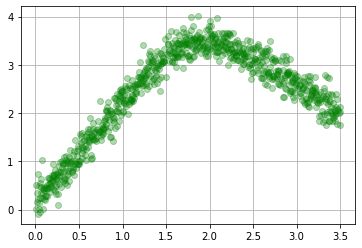

In [15]:
plt.plot(X_train, y_train, 'og', alpha=0.3)
plt.grid()
plt.show()

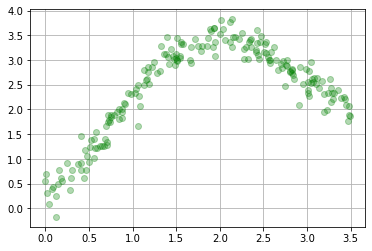

In [16]:
plt.plot(X_test, y_test, 'og', alpha=0.3)
plt.grid()
plt.show()

## fit_p_coef=False

In [17]:
fs = SklSingleExpFrequencyScan(filling_pulse=2*10**-5,
                               fit_p_coef=False,
                               learning_rate=0.05,
                               n_iters=200,
                               stop_val=10**-5,
                               verbose=False
                              )

fs.fit(X=X_train, y=y_train)

SklSingleExpFrequencyScan(filling_pulse=2e-05, fit_p_coef=False,
                          learning_rate=0.05, n_iters=200, stop_val=1e-05)

In [18]:
def display_scores(scores):
    print(f'Scores: {scores}')
    print(f'Mean: {scores.mean()}')
    print(f'Standard deviation: {scores.std()}')

scores = cross_val_score(fs, X_train, y_train, scoring='neg_mean_squared_error', cv=10, n_jobs=-1)

display_scores(np.sqrt(-scores))

Scores: [1.15364315 1.21807468 1.21669568 1.12886292 1.16736975 1.20044792
 1.25169361 1.17257284 1.15878915 1.23709633]
Mean: 1.1905246026384266
Standard deviation: 0.03805382309290973


In [19]:
fs.fit_results_

,n_exps,filling_pulse,loss,amplitude,time_constant_power,p_coef
0,1,0.00002,1.773723,3.5,-2.395257,1.0
1,1,0.00002,1.725549,3.526685,-2.350802,1.0
2,1,0.00002,1.69301,3.553011,-2.317638,1.0
3,1,0.00002,1.669597,3.578824,-2.293083,1.0
4,1,0.00002,1.65153,3.604049,-2.275013,1.0
...,...,...,...,...,...,...
136,1,0.00002,1.413153,4.520057,-2.2327,1.0
137,1,0.00002,1.413142,4.520813,-2.232706,1.0
138,1,0.00002,1.413131,4.521549,-2.232712,1.0
139,1,0.00002,1.413121,4.522267,-2.232717,1.0


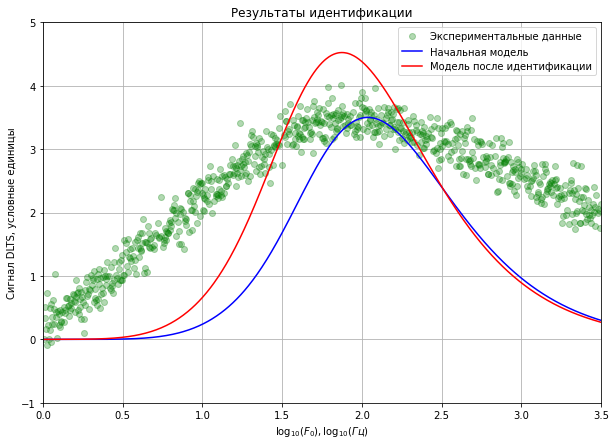

In [20]:
fit_results = fs.fit_results_

fig, ax = plot_ident_res(X_train,
                         y_train, 
                         fit_results
                        )

plt.show()

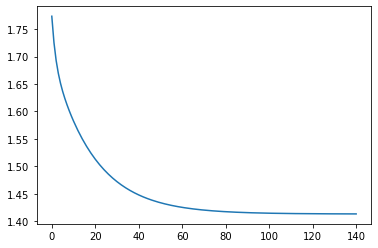

In [21]:
plt.plot(fit_results.loss)
plt.show()

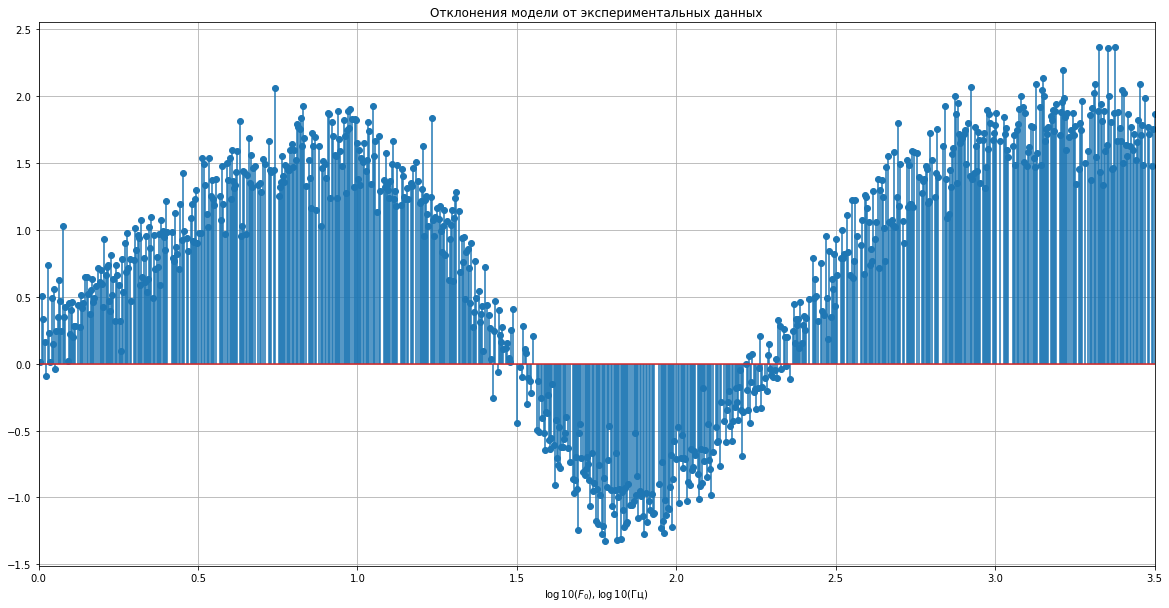

In [22]:
plt.figure(figsize=(20,10))
plt.stem(X_train, (y_train - fs.predict(X_train)))
plt.grid()
plt.title('Oтклонения модели от экспериментальных данных')
plt.xlabel(r'$\log10(F_0), \log10($Гц$)$')
plt.xlim(0, 3.5)
plt.show()

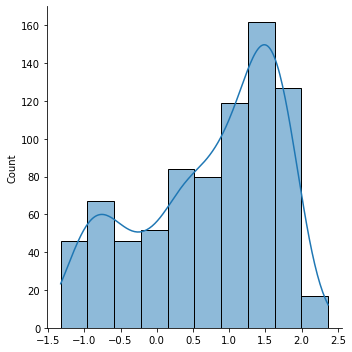

In [23]:
sns.displot(x=y_train - fs.predict(X_train), bins=10, kde=True)
plt.show()

## fit_p_coef=True

In [24]:
fs = SklSingleExpFrequencyScan(filling_pulse=2*10**-5,
                               fit_p_coef=True,
                               learning_rate=0.05,
                               n_iters=200,
                               stop_val=10**-5,
                               verbose=False
                              )

fs.fit(X=X_train, y=y_train)

SklSingleExpFrequencyScan(filling_pulse=2e-05, learning_rate=0.05, n_iters=200,
                          stop_val=1e-05)

In [25]:
def display_scores(scores):
    print(f'Scores: {scores}')
    print(f'Mean: {scores.mean()}')
    print(f'Standard deviation: {scores.std()}')

scores = cross_val_score(fs, X_train, y_train, scoring='neg_mean_squared_error', cv=10, n_jobs=-1)

display_scores(np.sqrt(-scores))

Scores: [0.20530917 0.18346376 0.22267554 0.21084188 0.19639424 0.19191898
 0.20092585 0.22562226 0.19459946 0.19007927]
Mean: 0.20218304126272008
Standard deviation: 0.013224797177751777


In [26]:
fs.fit_results_

,n_exps,filling_pulse,loss,amplitude,time_constant_power,p_coef
0,1,0.00002,3.120521,3.5,-3.013754,1.0
1,1,0.00002,2.550511,3.511211,-2.856883,0.933138
2,1,0.00002,2.032094,3.527581,-2.714097,0.854218
3,1,0.00002,1.573786,3.547673,-2.591381,0.763234
4,1,0.00002,1.160297,3.569806,-2.490711,0.660523
...,...,...,...,...,...,...
66,1,0.00002,0.040743,3.511467,-2.287474,0.205391
67,1,0.00002,0.040731,3.510704,-2.287582,0.205275
68,1,0.00002,0.04072,3.509965,-2.287686,0.205162
69,1,0.00002,0.04071,3.509248,-2.287788,0.205052


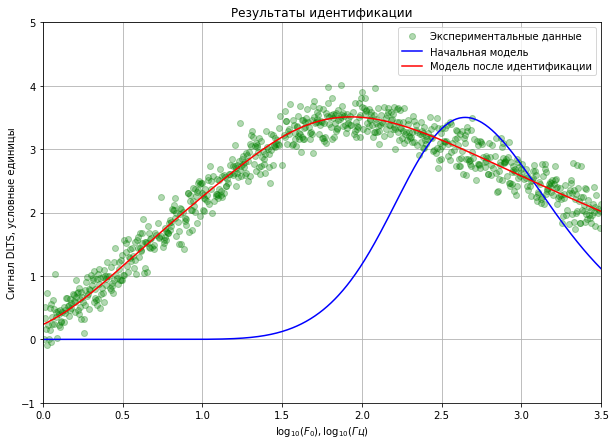

In [27]:
fit_results = fs.fit_results_

fig, ax = plot_ident_res(X_train,
                         y_train, 
                         fit_results
                        )

plt.show()

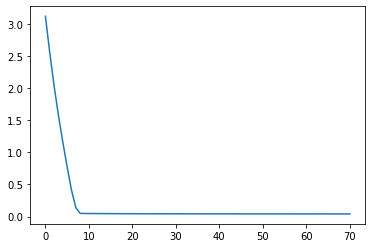

In [28]:
plt.plot(fs.fit_results_.loss)
plt.show()

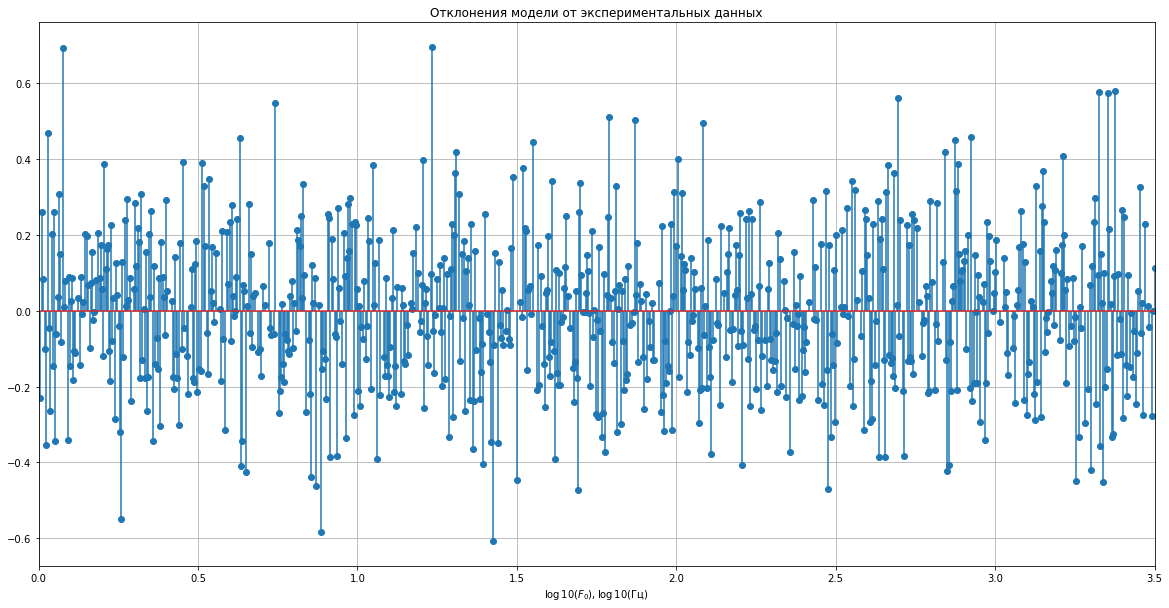

In [29]:
plt.figure(figsize=(20,10))
plt.stem(X_train, (y_train - fs.predict(X_train)))
plt.grid()
plt.title('Oтклонения модели от экспериментальных данных')
plt.xlabel(r'$\log10(F_0), \log10($Гц$)$')
plt.xlim(0, 3.5)
plt.show()

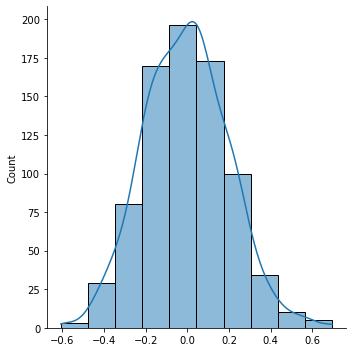

In [30]:
sns.displot(x=y_train - fs.predict(X_train), bins=10, kde=True)
plt.show()

## GridSearchCV

In [31]:
grid_search = GridSearchCV(fs, {'fit_p_coef': [False, True]}, cv=10, scoring='neg_mean_squared_error',
                           return_train_score=True, n_jobs=-1)

In [32]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=SklSingleExpFrequencyScan(filling_pulse=2e-05,
                                                 learning_rate=0.05,
                                                 n_iters=200, stop_val=1e-05),
             n_jobs=-1, param_grid={'fit_p_coef': [False, True]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [33]:
grid_search.best_params_

{'fit_p_coef': True}

In [34]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)

1.1911333976445766 {'fit_p_coef': False}
0.20261542395387747 {'fit_p_coef': True}


In [35]:
scores = cross_val_score(grid_search.best_estimator_, X_train, y_train, scoring='neg_mean_squared_error', cv=10, n_jobs=-1)

display_scores(np.sqrt(-scores))

Scores: [0.20530819 0.18347597 0.22267643 0.21085555 0.19637963 0.19191919
 0.20093236 0.2256129  0.19457222 0.19008628]
Mean: 0.20218187188381412
Standard deviation: 0.013223907288943354


In [36]:
grid_search.best_estimator_.fit_results_

,n_exps,filling_pulse,loss,amplitude,time_constant_power,p_coef
0,1,0.00002,1.715151,3.5,-2.151749,1.0
1,1,0.00002,1.500739,3.527042,-2.172028,0.903686
2,1,0.00002,1.259094,3.553693,-2.185312,0.799709
3,1,0.00002,0.985178,3.57956,-2.192827,0.687623
4,1,0.00002,0.682365,3.603959,-2.195585,0.568091
...,...,...,...,...,...,...
70,1,0.00002,0.040742,3.511375,-2.287486,0.205377
71,1,0.00002,0.04073,3.510615,-2.287593,0.205261
72,1,0.00002,0.040719,3.509878,-2.287698,0.205149
73,1,0.00002,0.040708,3.509163,-2.287799,0.20504


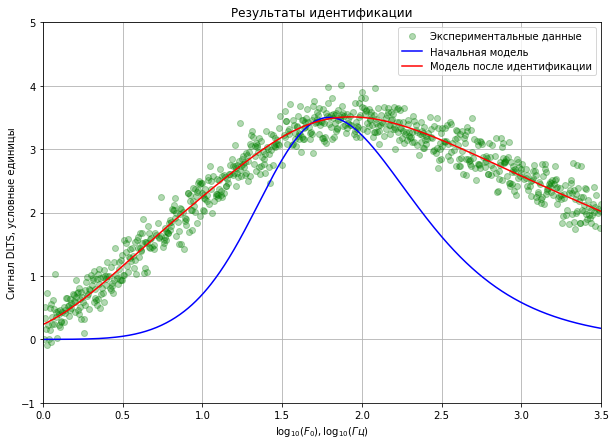

In [37]:
fit_results = grid_search.best_estimator_.fit_results_

fig, ax = plot_ident_res(X_train,
                         y_train, 
                         fit_results
                        )

plt.show()

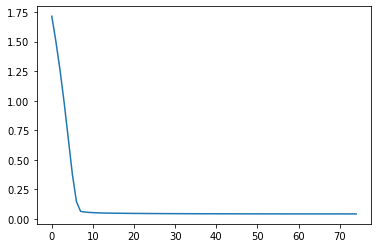

In [38]:
plt.plot(grid_search.best_estimator_.fit_results_.loss)
plt.show()

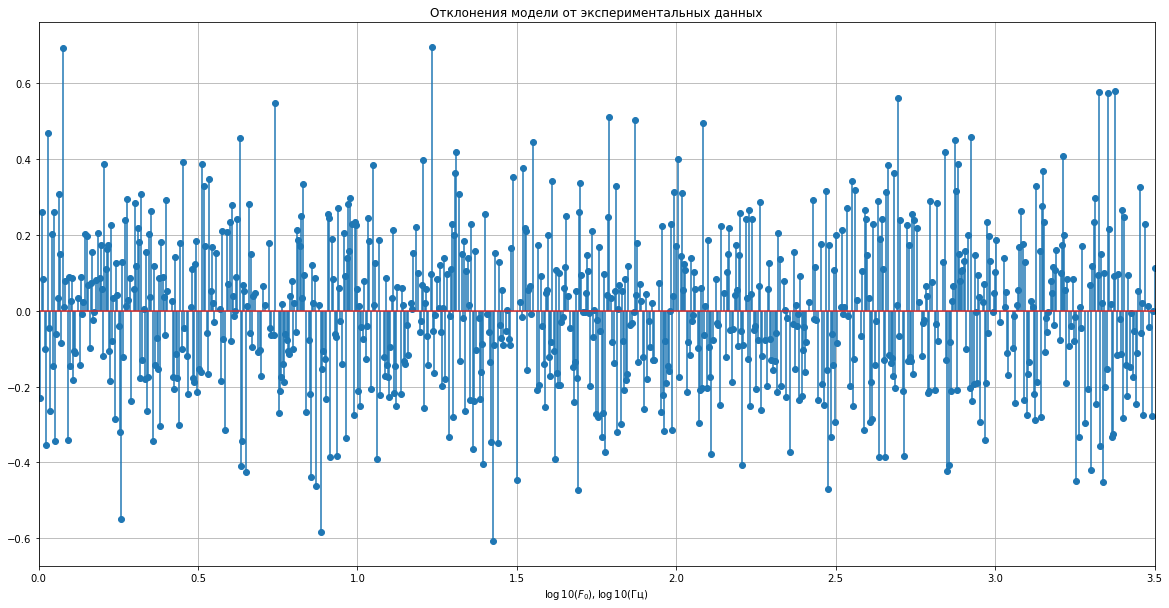

In [39]:
plt.figure(figsize=(20,10))
plt.stem(X_train, (y_train - grid_search.best_estimator_.predict(X_train)))
plt.grid()
plt.title('Oтклонения модели от экспериментальных данных')
plt.xlabel(r'$\log10(F_0), \log10($Гц$)$')
plt.xlim(0, 3.5)
plt.show()

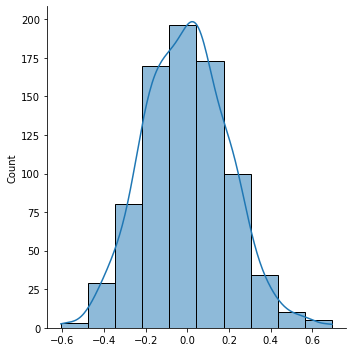

In [40]:
sns.displot(x=y_train - grid_search.best_estimator_.predict(X_train), bins=10, kde=True)
plt.show()

In [41]:
mean_squared_error(y_test, grid_search.best_estimator_.predict(X_test), squared=False)

0.2016841708695078